## Analysis of 'show_number' Actions Throughout a Month 


The data in the calls_task.csv file represents 'show_number' actions throughout a whole month, 
and what is needed is the following:

1)Explanation with a graph for the problem


2)Potential causes of the problem


3)Suggestions to mitigate it in the future

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\PC\Desktop\Tasks\Task1\calls_task.csv")

# Data Overview

In [3]:
data

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE
0,2022-04-10T01:57:30Z,89821691,116778534.0,show_number
1,2022-04-10T02:08:47Z,89915585,110472624.0,show_number
2,2022-04-10T02:31:42Z,90099017,6961446.0,show_number
3,2022-04-05T16:46:39Z,43538787,107681746.0,show_number
4,2022-04-05T17:03:33Z,43670683,108485886.0,show_number
...,...,...,...,...
496723,2022-04-14T18:59:46Z,137134739,118280514.0,show_number
496724,2022-04-14T19:00:08Z,137137555,118280514.0,show_number
496725,2022-04-19T13:57:25Z,187460783,118579286.0,show_number
496726,2022-04-24T16:34:48Z,242643555,118821126.0,show_number


#### Data Shape

In [4]:
data.shape

(496728, 4)

#### Data Columns Types

In [5]:
data.dtypes

ACTION_DATE     object
ACTION_ID        int64
MEMBER_ID      float64
ACTION_TYPE     object
dtype: object

In [6]:
print('Number of unique values in ACTION_ID: ',data['ACTION_ID'].nunique())
print('Number of unique values in MEMBER_ID: ',data['MEMBER_ID'].nunique())
print('Number of unique values in ACTION_DATE: ',data['ACTION_DATE'].nunique())
print('Number of unique values in ACTION_TYPE: ',data['ACTION_TYPE'].nunique())

Number of unique values in ACTION_ID:  496728
Number of unique values in MEMBER_ID:  29869
Number of unique values in ACTION_DATE:  338458
Number of unique values in ACTION_TYPE:  1


## Data Integrity 

#### Duplicates

In [7]:
print('Duplicates between records: ',data.duplicated().sum())
print('Duplicates in ACTION_ID column: ',data['ACTION_ID'].duplicated().sum())


Duplicates between records:  0
Duplicates in ACTION_ID column:  0


#### Missing Values

In [8]:
data.isna().sum()

ACTION_DATE      0
ACTION_ID        0
MEMBER_ID      476
ACTION_TYPE      0
dtype: int64

# Data Exploration and Analysis

## Handling Missing Values 

###### Solution 1 for missing values

In [9]:
nulls = data[data['MEMBER_ID'].isnull()]
display(nulls)
print('Percentage of null records: ', round( (nulls.shape[0]/data.shape[0] * 100) ,2))
# Sine the percentage of null records does not exceed 1% of overall records then I will drop these null records 
data.dropna(inplace=True)

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE
3654,2022-04-06T11:30:45Z,50956777,NaN,show_number
3897,2022-04-23T11:10:32Z,228472079,NaN,show_number
4213,2022-04-26T23:16:00Z,268771103,NaN,show_number
5230,2022-04-05T14:07:05Z,42294177,NaN,show_number
5245,2022-04-02T20:41:30Z,17189237,NaN,show_number
...,...,...,...,...
493971,2022-04-28T12:14:01Z,283846961,NaN,show_number
494027,2022-04-06T15:19:43Z,52720911,NaN,show_number
494731,2022-04-11T13:47:17Z,103957255,NaN,show_number
496162,2022-04-03T14:49:25Z,24005959,NaN,show_number


Percentage of null records:  0.1


###### Solution 2 for missing values

In [10]:
# data.fillna(-1, inplace=True)
# null = data[data['MEMBER_ID']==-1]
# null['AD'] = pd.to_datetime(null['ACTION_DATE'])
# null['Day']= null['AD'].dt.day

# DayHours = null.groupby('Day')['ACTION_ID'].count().reset_index(name='count')

# plt.plot(DayHours['Day'], DayHours['count'], marker='o', color='darkblue')
# plt.xticks(DayHours['Day'], rotation=45, ha="right")
# plt.xlabel('Day')
# plt.ylabel('Number of Actions')
# plt.title('Number of Actions per Day without known member')

# plt.show()

# #number of actions without known member have been decreased over time

There are different ways to handle missing values, but these ways depend on the Domain Knowledge of the problem. If there is only interest in actions and their IDs, rather than the members themselves, then members' missing values can be replaced with (-1) to indicate that this action has no ‘MEMBER_ID’ but the action itself will be recorded. 
Since I do not have a background about the problem, and with only 476 missing values in the 'MEMBER_ID' column (less than 1% of the data) I decided to drop those records due to their minimal impact.


## Data Types & Consistency

#### Converting the ID columns to String 

In [11]:
data['ACTION_ID'] = data['ACTION_ID'].astype(str)
data['MEMBER_ID'] = data['MEMBER_ID'].astype(int).astype(str) #To (int) first to remove the decimal part (.0)

To maintain consistency, I converted ‘ACTION_ID’ and ‘MEMBER_ID’ columns to string format, I also converted ‘ACTION_DATE’ to datetime format.

#### Timezone Consideration:

In [12]:
# Check if all records have the same timezone
data['ACTION_DATE'] = pd.to_datetime(data['ACTION_DATE'])

first_timezone = data['ACTION_DATE'].iloc[0].tzinfo

all_same_timezone = all(record.tzinfo == first_timezone for record in data['ACTION_DATE'])

if all_same_timezone:
    print("All records in the ACTION_DATE column have the same timezone.")
else:
    print("Records in the ACTION_DATE column have different timezones.")
    
#Since all records have the same timezone we can remove it for better appearance
data['ACTION_DATE'] = data['ACTION_DATE'].dt.tz_localize(None)


All records in the ACTION_DATE column have the same timezone.


All records in the 'ACTION_DATE' column were found to have the same timezone, allowing for the removal of timezone information for better visualization.

## Feature Engineering

In [13]:
data['Date'] = data['ACTION_DATE'].dt.date
data['Time'] = data['ACTION_DATE'].dt.time
data['Day']= data['ACTION_DATE'].dt.day
data['Hour']= data['ACTION_DATE'].dt.hour

# data['Minute']= data['ACTION_DATE'].dt.minute
# data['Second']= data['ACTION_DATE'].dt.second


In [14]:
data

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE,Date,Time,Day,Hour
0,2022-04-10 01:57:30,89821691,116778534,show_number,2022-04-10,01:57:30,10,1
1,2022-04-10 02:08:47,89915585,110472624,show_number,2022-04-10,02:08:47,10,2
2,2022-04-10 02:31:42,90099017,6961446,show_number,2022-04-10,02:31:42,10,2
3,2022-04-05 16:46:39,43538787,107681746,show_number,2022-04-05,16:46:39,5,16
4,2022-04-05 17:03:33,43670683,108485886,show_number,2022-04-05,17:03:33,5,17
...,...,...,...,...,...,...,...,...
496723,2022-04-14 18:59:46,137134739,118280514,show_number,2022-04-14,18:59:46,14,18
496724,2022-04-14 19:00:08,137137555,118280514,show_number,2022-04-14,19:00:08,14,19
496725,2022-04-19 13:57:25,187460783,118579286,show_number,2022-04-19,13:57:25,19,13
496726,2022-04-24 16:34:48,242643555,118821126,show_number,2022-04-24,16:34:48,24,16


## Checking the data

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

print('Month: ',data['Date'].dt.month.unique()) #checking that the data has only April month
print('Number of days that has data: ',len(data['Date'].dt.day.unique()) )#checking that that there is data for 30 days 
print('Action Type: ',data['ACTION_TYPE'].unique()) #to make sure thar the action is only "show_number"
data.drop('ACTION_TYPE', axis = 1,inplace=True) #I don't need it anymore

Month:  [4]
Number of days that has data:  30
Action Type:  ['show_number']


## Investigating Data (Possible Data Problems)

#### Number of Actions per Day

In [16]:
dayActions = data.groupby('Day')['ACTION_ID'].count().reset_index(name='count')
dayActions.head()

,Day,count
0,1,6819
1,2,8798
2,3,10222
3,4,14168
4,5,13070


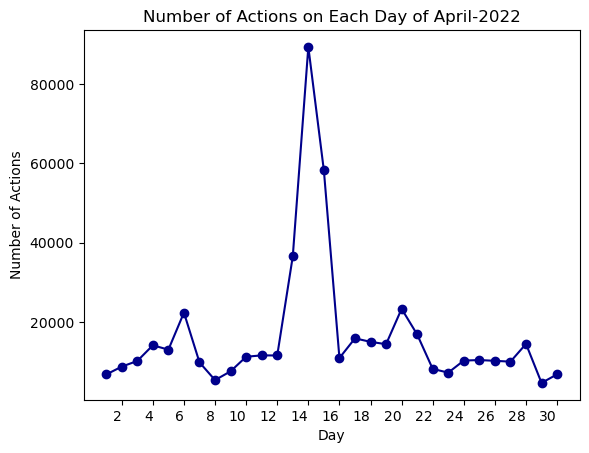

In [17]:
# plt.bar(dayActions['Day'], dayActions['count'])
plt.plot(dayActions['Day'], dayActions['count'], marker='o', color='darkblue')
even_ticks = dayActions['Day'][dayActions['Day'] % 2 == 0].tolist()
plt.xticks(even_ticks, ha="right")
plt.xlabel('Day')
plt.ylabel('Number of Actions')
plt.title('Number of Actions on Each Day of April-2022')
plt.show()

# As we can see that at day 14-04-2022 there was the largest number of actions

In [18]:
c= dayActions.set_index('Day')
print('The day that has the maximum # of actions is day:',c['count'].idxmax(),'with:', c['count'].max(),'actions')

The day that has the maximum # of actions is day: 14 with: 89303 actions


As shown, day 14-04-2022 had the highest number of actions, indicating a potential anomaly.

#### Number of Actions per Member

In [19]:
MemberActions = data.groupby('MEMBER_ID')['ACTION_ID'].count()
MemberActions.nlargest(30)

MEMBER_ID
118280514    103586
109995906     68349
118371934     46166
34551118      12778
113693220      6726
113158184      5322
100712124      4794
117687742      2923
16128090       2692
114619058      2181
117797614      2124
110630280      2102
118078498      1851
114765782      1774
99742024       1588
101904160      1576
86891144       1565
117950722      1486
101001376      1457
90991296       1353
116510782      1329
110127334      1305
117387406      1038
113559492       983
113505740       962
115529194       918
115652226       810
48817692        780
117948514       768
99618104        700
Name: ACTION_ID, dtype: int64

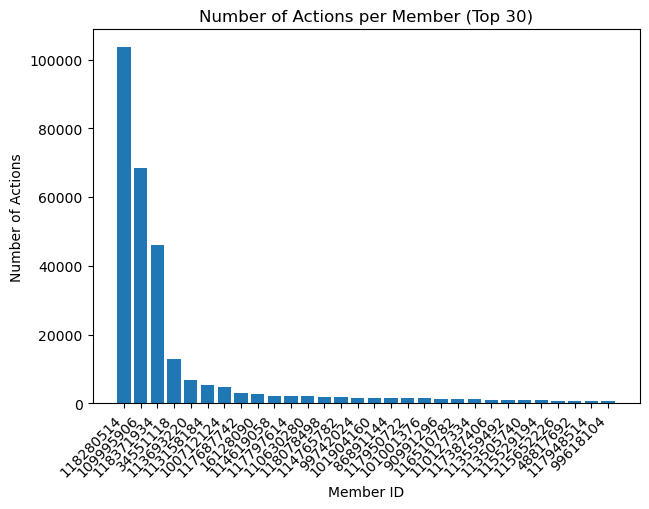

In [20]:
# I took a sample for the most 30 members that has done actions in the whole month
SampleMemberActions= MemberActions.nlargest(30).reset_index(name='count')

plt.bar(SampleMemberActions['MEMBER_ID'], SampleMemberActions['count'])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel('Member ID')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per Member (Top 30)')
plt.show()

In [21]:
c= SampleMemberActions.set_index('MEMBER_ID')
print('Member that has done the maximum # of actions is:',c['count'].idxmax(),'with:', c['count'].max(),'actions')

Member that has done the maximum # of actions is: 118280514 with: 103586 actions


As shown, Member '118280514' significantly dominates the number of actions with 103586 actions throughout the month.

####  Number of Actions per member per period of Time

In [22]:
#NumActions = data.groupby(['MEMBER_ID','Date','Time'])['ACTION_ID'].count()  
NumActions = data.groupby(['MEMBER_ID','ACTION_DATE'])['ACTION_ID'].count()  
print(NumActions)

NumActions= NumActions.reset_index(name='count')
#'count' column represents number of actions for ecah member for each time period

MEMBER_ID  ACTION_DATE        
1000006    2022-04-28 11:59:33    1
           2022-04-28 11:59:53    1
           2022-04-28 12:00:19    1
100000600  2022-04-05 14:46:28    1
           2022-04-19 14:19:10    1
                                 ..
99995312   2022-04-10 14:33:34    1
99995464   2022-04-02 12:21:59    1
99996660   2022-04-26 14:24:24    1
           2022-04-26 14:25:16    1
99997692   2022-04-11 19:50:47    1
Name: ACTION_ID, Length: 367512, dtype: int64


In [23]:
NumActions['count'].unique()
# There is count > 1 --> which means that per member per Period of Time there is more than 1 action !!!


array([ 1,  2,  3,  4,  7, 11, 12,  5,  6,  8,  9, 13, 18, 17, 15, 14, 21,
       16, 28, 19, 10, 22, 24, 25, 26, 20, 23, 27, 30, 29], dtype=int64)

In [24]:
display(NumActions[NumActions['count']>1].sort_values('count',ascending=False))
# As we can see here that there are 31846 record that shows that at the same second there is more than 1 action which is illogical


,MEMBER_ID,ACTION_DATE,count
204667,118280514,2022-04-14 02:50:36,30
227368,118371934,2022-04-15 01:01:46,30
231504,118371934,2022-04-15 06:22:32,30
231803,118371934,2022-04-15 06:49:46,30
231343,118371934,2022-04-15 06:07:33,30
...,...,...,...
222777,118280514,2022-04-14 22:23:15,2
222778,118280514,2022-04-14 22:23:16,2
203658,118280514,2022-04-13 20:41:40,2
203655,118280514,2022-04-13 20:41:09,2


In [25]:
NumActions2= NumActions.set_index('MEMBER_ID') 
print('Member ID that has the maximum # of actions at the same day & time period is:',NumActions2['count'].idxmax(),'with:', NumActions2['count'].max(),' actions')

Member ID that has the maximum # of actions at the same day & time period is: 118280514 with: 30  actions


Some members did plenty number actions at the same time.

In [26]:
# NumActions = NumActions[NumActions['count']>=21]
# # I took a sample which is only members who had done more than 20 action at the same period of time 

# g = sns.FacetGrid(NumActions, col="MEMBER_ID", col_wrap=4, height=4)
# g.map(plt.scatter, "ACTION_DATE", "count", alpha=.7)
# g.set_xticklabels(rotation=45) 
# g.set_ylabels("Number of Actions")
# g.fig.suptitle('Number of Actions Over Time for Each Member', y=1.02)
# plt.show()

# # in the 1st graph each point represent number of actions member 118280514 has done in the same period pf time 
# # Analysis of actions per member per period revealed instances of multiple actions within the same second, 
# #suggesting potential data anomalies.
# # In the data analysis, it was found that three members did more than 20 actions at the same time. 
# #The below figure shows a graphical representation of the actions of these three members. 
# #Each dot on the scatter plot represents a specific timestamp and the corresponding number of actions performed 
# #by a member (who has done more than 20 actions at the same time). 
# #However, it's important to note that due to ACTION_DATE included timestamps with high details (up to seconds), 
# #it leads to a dense concentration of points, causing overlapping issues in the scatter plot.


### Investigation of the Member with Maximum Actions 

Further investigation of the member with the maximum number of actions ('118280514') on 14-04-2022 (the day with the largest number of actions) 

In [27]:
Day14 = data[data['Date']=='2022-04-14']

In [28]:
Day14['MEMBER_ID'].value_counts()

118280514    79157
113693220      654
113158184      399
86891144       169
99742024       155
             ...  
320820           1
26682832         1
5791706          1
27554324         1
118125818        1
Name: MEMBER_ID, Length: 2479, dtype: int64

As we saw that at day 14 total number of actions was 89303, and here we see that member 118280514 has done 79157 actions 
at this day , which means 88% of all actions at day 14 were done by this member


##### Number of actions per hour at 14-april for member 118280514

In [29]:
userX14 = Day14[Day14['MEMBER_ID']=='118280514']

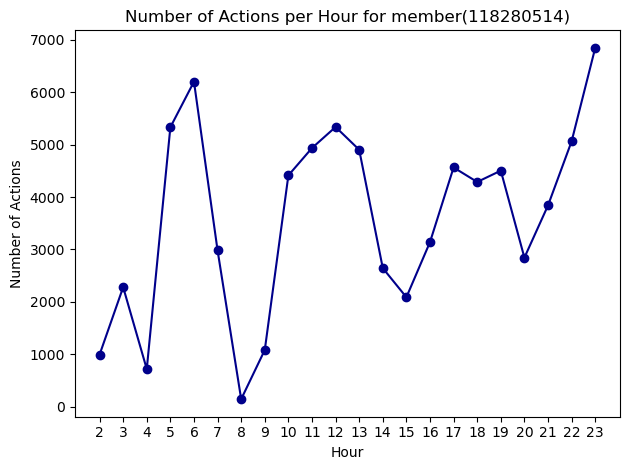

In [30]:
userX14 = userX14.groupby('Hour')['ACTION_ID'].count().reset_index(name='count')
# plt.bar(userX14['Hour'], userX14['count'])
plt.plot(userX14['Hour'], userX14['count'], marker='o', color='darkblue')
plt.xticks(userX14['Hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per Hour for member(118280514)')
plt.tight_layout()
plt.show()

In [31]:
userX14
# at hour 23 he done 6849 action , which means 114 action per minute  

,Hour,count
0,2,991
1,3,2280
2,4,716
3,5,5334
4,6,6204
5,7,2982
6,8,142
7,9,1081
8,10,4415
9,11,4937


as shown in the figure above, an Analysis of actions per hour for this member showed that he was doing actions for 22 hours on 14-04-2022, which is illogical.

# Potential Causes of the Problem

The problem centers around an abnormal surge in 'show_number' actions, particularly on 14-04-2022, primarily driven by member '118280514'. In addition to the issue where there is more than one action recorded per second for some members. 

Potential causes of the problem are, 
1.	Technical Glitches.
2.	Automated Actions, for example, if members are rewarded for performing 'show_number' actions, they may feed the system with false data (not humans that are doing actions). 


# Recommendations for Mitigation


To address the problem, the following recommendations may help solve the problem,
1.	Monitoring and Alerts:

    Implement real-time monitoring systems with alert mechanisms to notify stakeholders of unusual patterns in actions, for         example, when there are several actions at the same second.


2.	Communication with Members:

    Communicate with members to address the problem with their actions.
